In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [81]:
worlds = {
    'circles': 
    [200, 200,
     [[100, 100, 60]
     ]
    ],
    'circles_asym': 
    [200, 230,
     [[95, 85, 60], 
      [25, 180, 20]
     ]
    ]           
}

In [87]:
world = worlds['circles_asym']

# world properties
w, h = world[0], world[1]
circles = world[2]
e = 5
ww = w + 2*e
hh = h + 2*e

In [112]:
def plot(pts, title):
    print('With duplicates:    ', len(pts))
    pts = list(set([tuple(elem) for elem in pts]))
    print('Without duplicates: ', len(pts))
    xs, ys = zip(*pts)
    plt.plot(xs, ys, 'o', markersize=2)

    plt.axvline(0, e/hh, 1 - e/hh, w, color='r', alpha=0.5)
    plt.axvline(w, e/hh, 1 - e/hh, color='r', alpha=0.5)
    plt.axhline(0, e/ww, 1 - e/ww, color='r', alpha=0.5)
    plt.axhline(h, e/ww, 1 - e/ww, color='r', alpha=0.5)

    plt.axvline(15, (15+e) / hh, 1 - (15+e) / hh, color='g', alpha=0.5)
    plt.axvline(w-15, (15+e) / hh, 1 - (15+e) / hh, color='g', alpha=0.5)
    plt.axhline(15, (15+e) / ww, 1 - (15+e) / ww, color='g', alpha=0.5)
    plt.axhline(h-15, (15+e) / ww, 1 - (15+e) / ww, color='g', alpha=0.5)

    for cx, cy, r in circles:
        circle=plt.Circle((cx, cy), r, color='r', alpha=0.3)
        plt.gcf().gca().add_artist(circle)
    plt.axis((-e, w+e, -e, h+e))
    plt.title('{} (num pts: {})'.format(title, len(pts)))

In [107]:
# starting points
points = [[112, 197], [135, 149], [107, 170], [80, 159], [106, 164], [140, 159], [52, 157], [175, 63], [142, 200], [129, 187], [46, 212], [130, 190], [33, 20], [66, 165], [36, 28], [157, 160], [181, 184], [156, 156], [170, 194], [54, 201], ]
points_test = [[83, 177], [183, 206], [148, 150], [148, 140], [147, 25], [180, 123], [89, 214], [50, 25], [114, 174], [87, 167], [23, 62], [174, 42], [166, 142], [114, 194], [145, 27], [60, 155], [36, 21], [177, 165], [135, 190], [84, 172], [138, 179], [157, 168], [183, 28], [177, 209], [130, 191], [105, 174], [175, 70], [109, 183], [105, 210], [20, 77], [177, 146], [73, 191], [17, 70], [157, 169], [176, 157], [16, 125], [33, 142], [167, 210], [46, 210], [168, 176], [176, 204], [185, 160], [185, 205], [169, 146], [25, 40], [182, 29], [124, 176], [179, 202], [86, 165], [176, 158], [46, 144], [139, 146], [37, 18], [173, 207], [27, 26], [167, 24], [167, 122], [33, 42], [149, 168], [24, 118], [130, 188], [109, 165], [90, 174], [128, 159], [47, 149], [121, 208], [69, 206], [125, 164], [125, 176], [144, 20], [175, 15], [139, 24], [123, 202], [138, 203], [90, 167], [172, 142], [26, 23], [120, 186], [154, 212], [18, 54], [170, 174], [181, 146], [62, 170], [183, 111], [181, 19], [113, 192], [128, 173], [181, 147], [113, 198], [90, 175], [91, 169], [133, 207], [178, 103], [20, 17], [167, 191], [58, 202], [172, 110], [25, 135], [117, 191], [42, 143], [47, 22], [68, 156], [166, 149], [104, 171], [144, 194], [163, 25], [101, 171], [181, 147], [51, 212], [183, 202], [131, 165], [119, 208], [144, 166], [179, 189], [91, 187], [90, 176], [92, 178], [20, 143], [118, 178], [175, 175], [85, 176], [55, 17], [172, 37], [62, 167], [46, 208], [171, 183], [183, 56], [34, 145], [27, 132], [154, 203], [174, 213], [172, 29], [147, 200], [26, 140], [57, 151], [176, 54], [75, 160], [55, 152], [54, 151], [177, 97], [63, 204], [121, 161], [180, 112], [20, 32], [152, 158], [146, 167], [164, 192], [147, 148], [173, 144], [28, 141], [168, 135], [159, 128], [63, 208], [177, 209], [181, 187], [184, 15], [135, 176], [181, 134], [67, 156], [122, 161], [181, 207], [148, 158], [137, 169], [135, 168], [174, 103], [164, 136], [181, 19], [126, 163], [129, 17], [185, 175], [127, 156], [142, 211], [39, 31], [181, 60], [131, 200], [22, 26], [63, 172], [166, 25], [166, 166], [168, 157], [166, 209], [76, 195], [100, 207], [118, 197], [90, 212], [166, 51], [178, 106], [168, 20], [63, 191], [41, 25], [173, 48], [20, 107], [106, 164], [128, 180], [175, 141], [171, 88], [169, 112], [182, 153], [100, 182], [140, 146], [155, 207], [129, 203], [172, 35], [55, 200], [164, 123], [88, 212], [147, 150], [47, 213], [100, 205], [170, 173], [98, 162], [94, 197], [80, 203], [83, 201], [172, 58], [106, 174], [166, 182], [151, 210], [73, 173], [27, 137], [142, 23], [185, 215], [75, 192], [64, 187], [139, 19], [150, 203], [173, 42], [167, 121], [19, 56], [56, 20], [20, 22], [173, 119], [30, 130], [175, 153], [144, 148], [181, 73], [185, 209], [68, 159], [125, 154], [162, 139], [167, 63], [40, 138], [174, 99], [36, 214], [58, 212], [167, 48], [175, 183], [135, 160], [87, 162], [184, 110], [30, 144], [69, 175], [115, 183], [155, 192], [159, 172], [158, 192], [83, 207], [39, 35], [163, 117], [146, 177], [139, 171], [184, 87], [172, 180], [18, 93], [181, 73], [179, 214], [182, 136], [57, 196], [28, 134], [23, 45], [179, 160], [184, 152], [166, 148], [161, 187], [176, 117], [154, 23], [169, 213], [185, 68], [100, 207], [175, 100], [34, 32], [76, 206], [169, 101], [104, 183], [116, 160], [165, 182], [175, 112], [124, 174], [157, 40], [151, 174], [183, 189], [158, 127], [81, 204], [180, 43], [139, 177], [17, 123], [124, 198], [21, 59], [160, 210], [67, 156], [165, 197], [166, 189], [140, 205], [28, 18], [80, 212], [103, 194], [120, 157], [75, 163], [25, 43], [165, 181], [133, 161], [131, 199], [169, 166], [21, 122], [183, 210], [176, 19], [176, 106], [115, 169], [180, 87], [81, 209], [23, 111], [141, 18], [169, 137], [27, 31], [60, 197], [144, 175], [169, 52], [97, 192], [156, 19], [17, 66], [98, 176], [23, 16], [122, 209], [32, 142], [83, 170], [165, 39], [19, 145], [170, 50], [176, 187], [175, 89], [50, 211], [182, 163], [32, 27], [165, 175], [167, 212], [44, 211], [157, 196], [72, 177], [74, 182], [28, 41], [116, 173], [185, 41], [132, 207], [124, 195], [24, 20], [169, 35], [177, 41], [72, 205], [173, 68], [19, 45], [182, 137], [107, 197], [174, 199], [118, 157], [92, 189], [161, 44], [19, 41], [125, 170], [81, 190], [184, 145], [68, 160], [91, 190], [53, 18], [60, 191], [112, 193], [77, 180], [125, 180], [89, 177], [24, 137], [167, 197], [129, 208], [97, 160], [120, 214], [136, 195], [174, 43], [162, 155], [90, 180], [185, 213], [71, 171], [155, 141], [112, 202], [177, 113], [25, 19], [89, 209], [60, 173], [178, 192], [164, 117], [19, 77], [173, 171], [183, 197], [97, 162], [158, 16], [94, 215], [25, 45], [166, 193], [95, 204], [131, 166], [22, 103], [115, 190], [133, 152], [147, 201], [172, 127], [33, 139], [66, 164], [185, 58], [139, 171], [15, 65], [29, 140], [71, 180], [179, 125], [127, 171], [181, 104], [70, 185], [102, 213], [166, 185], [161, 196], [143, 180], [169, 128], [143, 165], [89, 202], [181, 131], [177, 206], [173, 120], [134, 185], [139, 155], [110, 202], [169, 150], [37, 30], [47, 17], [58, 201], [86, 208], [177, 171], [181, 191], [169, 126], [18, 72], [109, 191], [24, 36], [147, 200], [46, 147], [149, 170], [174, 131], [165, 54], [170, 76], [97, 215], [61, 161], [164, 161], [167, 134], [167, 203], [69, 195], [140, 148], [182, 205], [161, 151], [170, 39], [182, 209], [130, 208], [179, 33], [112, 175], [129, 191], [182, 188], [35, 38], [104, 194], [157, 147], [164, 167], [159, 185], [31, 29], [99, 209], [38, 27], [173, 158], [184, 124], [179, 136], [176, 35], [85, 169], [170, 185], [157, 200], [175, 161], [120, 210], [166, 48], [89, 163], [38, 35], [185, 80], [182, 115], [19, 95], [59, 190], [153, 211], [44, 211], [169, 61], [182, 92], [156, 40], [29, 32], [36, 135], [142, 17], [19, 132], [60, 158], [128, 191], [140, 24], [184, 90], [62, 200], [184, 185], [116, 201], [21, 67], [177, 98], [16, 67], [181, 139], [37, 141], [18, 116], [32, 142], [149, 26], [35, 145], [172, 89], [141, 166], [136, 209], [116, 169], [26, 21], [161, 130], [147, 172], [79, 161], [28, 130], [86, 179], [172, 208], [102, 189], [184, 136], [170, 191], [73, 171], [84, 163], [167, 176], [148, 172], [184, 136], [85, 169], [41, 28], [117, 202], [173, 65], [168, 61], [178, 166], [50, 215], [19, 15], [133, 151], [26, 134], [184, 206], [129, 203], [100, 168], [70, 197], [163, 180], [122, 157], [170, 108], [172, 154], [181, 89], [165, 141], [45, 215], [18, 81], [173, 56], [173, 114], [83, 167], [86, 179], [18, 66], [77, 201], [31, 35], [17, 92], [64, 208], [15, 54], [162, 37], [75, 196], [117, 157], [66, 162], [153, 205], [45, 22], [20, 46], [34, 29], [166, 42], [129, 186], [98, 215], [81, 185], [185, 69], [162, 191], [165, 178], [15, 95], [172, 204], [170, 109], [181, 134], [155, 178], [159, 16], [41, 16], [91, 201], [148, 211], [173, 103], [120, 180], [61, 186], [170, 58], [158, 213], [133, 151], [174, 183], [180, 201], [124, 201], [183, 171], [150, 168], [177, 83], [23, 15], [173, 111], [158, 43], [168, 199], [170, 96], [82, 212], [125, 178], [168, 33], [90, 200], [138, 148], [155, 155], [61, 198], [25, 17], [153, 17], [120, 201], [183, 105], [47, 146], [170, 85], [180, 152], [78, 208], [181, 178], [143, 18], [185, 20], [102, 189], [16, 48], [19, 71], [180, 176], [121, 196], [96, 166], [96, 214], [184, 47], [117, 159], [143, 207], [172, 140], [79, 176], [156, 144], [185, 207], [174, 63], [138, 178], [159, 164], [179, 135], [110, 193], [185, 27], [65, 192], [29, 18], [151, 196], [132, 163], [180, 139], [90, 205], [166, 39], [34, 25], [168, 107], [160, 26], [33, 19], [67, 167], [98, 210], [18, 82], [43, 214], [160, 18], [103, 172], [170, 104], [50, 25], [185, 121], [32, 141], [183, 142], [129, 198], [165, 52], [139, 157], [134, 164], [158, 143], [115, 170], [184, 78], [78, 201], [79, 214], [183, 153], [152, 137], [41, 28], [163, 169], [41, 142], [153, 164], [157, 24], [173, 154], [184, 153], [64, 180], [182, 127], [159, 17], [154, 36], [30, 143], [31, 43], [63, 159], [148, 31], [22, 108], [59, 156], [124, 194], [86, 207], [180, 134], [172, 138], [164, 208], [183, 173], [120, 156], [170, 125], [171, 161], [184, 186], [181, 153], [69, 164], [151, 184], [23, 29], [174, 61], [171, 158], [175, 146], [104, 201], [182, 120], [109, 168], [164, 146], [151, 156], [39, 139], [172, 76], [21, 70], [120, 181], [62, 180], [146, 199], [136, 187], [175, 173], [149, 200], [179, 51], [143, 154], [60, 201], [46, 213], [20, 26], [67, 204], [130, 213], [149, 20], [172, 155], [107, 173], [42, 24], [123, 165], [67, 184], [164, 203], [59, 215], [167, 193], [32, 136], [70, 183], [160, 168], [111, 165], [21, 34], [99, 184], [20, 127], [178, 198], [79, 174], [144, 23], [18, 85], [22, 116], [123, 212], [165, 166], [172, 156], [31, 131], [183, 65], [170, 76], [176, 191], [174, 211], [176, 63], [174, 141], [120, 165], [104, 210], [138, 203], [166, 123], [162, 18], [70, 206], [137, 19], [173, 77], [176, 112], [105, 202], [110, 198], [83, 181], [153, 175], [166, 120], [178, 197], [177, 70], [171, 208], [82, 190], [162, 50], [114, 214], [168, 165], [53, 150], [22, 41], [70, 183], [90, 193], [113, 184], [149, 177], [168, 63], [134, 206], [183, 178], [19, 43], [85, 208], [95, 169], [144, 204], [171, 168], [77, 176], [181, 102], [176, 133], [181, 133], [69, 196], [180, 39], [145, 19], [168, 67], [77, 201], [99, 183], [181, 120], [154, 157], [183, 30], [18, 118], [18, 49], [28, 27], [146, 202], [28, 18], [108, 167], [174, 97], [97, 199], [182, 160], [173, 58], [17, 121], [29, 29], [134, 198], [185, 92], [173, 100], [64, 175], [24, 39], [158, 140], [17, 134], [33, 16], [164, 212], [176, 160], [137, 196], [133, 182], [16, 80], [155, 37], [94, 211], [159, 188], [174, 164], [166, 18], [183, 26], [143, 155], [42, 22], [52, 154], [168, 23], [17, 124], [175, 94], [72, 213], [36, 133], [35, 35], [151, 202], [109, 177], [181, 65], [153, 181], [135, 159], [153, 155], [182, 168], [134, 181], [66, 198], [95, 205], [139, 164], [81, 161], [175, 56], [104, 207], [126, 175], [183, 150], [155, 207], [145, 175], [41, 18], [115, 179], [16, 64], [87, 191], [77, 177], [81, 208], [147, 174], [175, 31], [76, 204], [116, 183], [142, 154], [40, 23], [62, 168], [22, 63], [106, 165], [82, 180], [123, 15], [21, 37], [106, 189], [177, 142], [179, 62], [176, 84], [62, 168], [183, 19], [118, 209], [27, 22], [140, 158], [167, 121], [166, 15], [124, 188], [121, 215], [184, 203], [176, 165], [90, 192], [179, 77], [17, 60], [88, 192], [143, 215], [110, 165], [184, 161], [85, 202], [178, 138], [79, 172], [78, 166], [175, 149], [62, 191], [21, 25], [165, 140], [140, 197], [174, 200], [86, 190], [180, 170], [15, 78], [183, 210], [182, 45], [157, 159], [166, 25], [157, 35], [104, 161], [89, 162], [123, 212], [65, 165], [104, 186], [67, 189], [167, 178], [15, 25], [173, 68], [140, 172], [152, 208], [100, 215], [90, 194], [83, 160], [122, 208], [95, 209], [166, 137], [144, 199], [180, 147], [171, 206], [175, 24], [159, 196], [175, 211], [159, 167], [170, 164], [175, 49], [107, 192], [74, 197], [146, 186], [158, 167], [137, 199], [115, 192], [168, 20], [153, 144], [76, 175], [180, 146], [62, 190], [160, 192], [166, 204], [176, 149], [142, 164], [21, 48], [171, 61], [118, 204], [23, 43], [184, 111], [160, 210], [25, 136], [147, 160], [72, 182], [16, 28], [170, 147], [160, 136], [103, 195], [120, 189], [148, 169], [180, 113], [156, 190], [86, 207], [166, 114], [23, 27], [121, 194], [117, 166], [162, 37], [72, 160], [179, 16], [106, 210], [133, 152], [181, 169], ]


With duplicates:     1000
Without duplicates:  964
With duplicates:     20
Without duplicates:  20


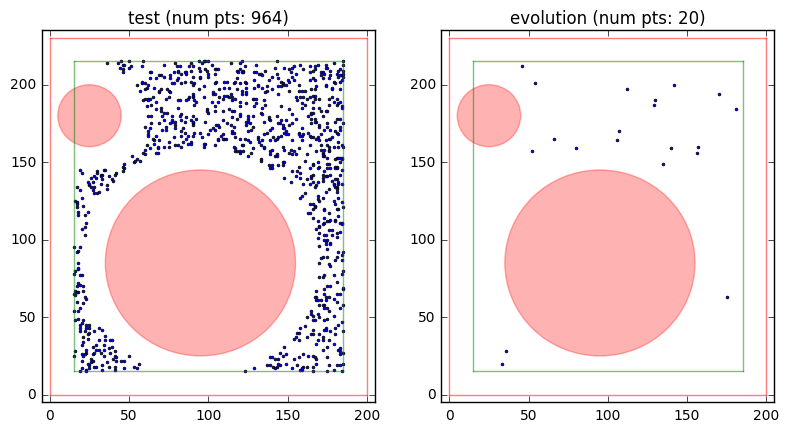

In [121]:
plt.figure(figsize=(2.25*ww/50, hh/50))
plt.subplot(1, 2, 1)
plot(points_test, 'test')
plt.subplot(1, 2, 2)
plot(points, 'evolution')